Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train Epoch: 01, Step: 020, loss=91.117988586
Train Epoch: 01, Step: 040, loss=247.775756836
Train Epoch: 01, Step: 060, loss=256.875183105
Train Epoch: 01, Step: 080, loss=84.606887817
Train Epoch: 01, Step: 100, loss=7.192567348
Train Epoch: 01, Step: 120, loss=0.212435246
Train Epoch: 01, Step: 140, loss=0.307813644
Train Epoch: 01, Step: 160, loss=0.254560083
Train Epoch: 01, Step: 180, loss=0.190199852
Train Epoch: 01, Step: 200, loss=0.108745165
Train Epoch: 01, Step: 220, loss=0.853204668
Train Epoch: 01, Step: 240, loss=0.038039759
Train Epoch: 01, Step: 260, loss=0.434839785
Train Epoch: 01, Step: 280, loss=0.004958879
Train Epoch: 01, Step: 300, loss=3.159710169
Train Epoch: 01, Step: 320, loss=0.040316787
Train Epoch: 01, Step: 340, loss=3.038142204
Train Epoch: 01, Step: 360, loss=1.145078897
Train Epoch: 01, Step: 380, loss=0.241363138
Train Epoch: 01, Step: 400, loss=0.021947706
Train Epoch: 

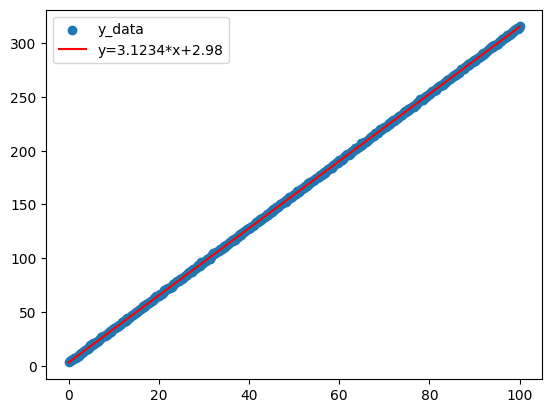

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# tf.enable_eager_execution()  # 在TensorFlow1.X版本中启用Eager Execution模式
tf.disable_eager_execution()  # 在TensorFlow2.X版本关闭Eager Execution
tf.__version__

x_data = np.linspace(0, 100, 500)
y_data = 3.1234 * x_data + 2.98 + np.random.randn(500) * 0.5

plt.scatter(x_data, y_data)
plt.plot(x_data, 3.1234 * x_data + 2.98, 'r')
plt.legend(['y_data', 'y=3.1234*x+2.98'])

x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
w = tf.Variable(1.0, name='w0')
b = tf.Variable(1.0, name='b0')
def model(x, w, b):
    return x * w + b
pred = model(x, w, b)
train_epochs = 10
learning_rate = 0.0001
display_step = 20
loss_function = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
sess = tf.Session()
init = tf.global_variables_initializer()
loss_list = []
step = 0
sess.run(init)
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
        loss_list.append(loss)
        step += 1
        if step % display_step == 0:
            print(f'Train Epoch: {epoch+1:02d}, Step: {step:03d}, loss={loss:.9f}')
x_test = 5.79
y_hat = sess.run(model(x_test, w, b))
y_target = 3 * x_test + 2
print(f'当x=5.79时，目标值为{y_target}，模型预测值为{y_hat}')

logdir = 'D:/Work/深度学习/chapter4'
tf.summary.FileWriter(logdir, tf.get_default_graph()).close()




tensorboard图像如下：

<img src="tensorboard.png">

<img src="tensorboard_main.png">

<img src="tensorboard1.png">